<a href="https://colab.research.google.com/github/RafalDoroz/mun/blob/main/Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Importujemy potrzebne biblioteki
import pandas as pd
from sklearn.datasets import load_breast_cancer  # Zbiór danych
from sklearn.model_selection import train_test_split  # Podział danych na treningowe i testowe
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting Classifier
from sklearn import metrics  # Metryki do oceny modelu
import matplotlib.pyplot as plt
import seaborn as sns  # Wizualizacja

# Wczytujemy dane - zestaw cancer
cancer = load_breast_cancer()
X = cancer.data  # dane wejściowe (cechy)
y = cancer.target  # etykiety (klasy)

# Tworzymy DataFrame z danymi cancer
cancer_df = pd.DataFrame(data=X, columns=cancer.feature_names)
cancer_df['target'] = y  # dodajemy kolumnę z etykietami

# Wyświetlamy pierwsze 5 wierszy zbioru danych
print("Zbiór danych cancer:")
print(cancer_df.head())


Zbiór danych cancer:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst a

In [23]:
# Podział danych na zbiór treningowy i testowy (70% - trening, 30% - test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
# Inicjalizacja modelu Gradient Boosting
gb_clf = GradientBoostingClassifier(
    n_estimators=200,        # Więcej drzew - 200 zamiast domyślnych 100
    learning_rate=0.05,      # Mniejsza szybkość uczenia dla dokładniejszego modelu
    max_depth=3,             # Maksymalna głębokość drzewa decyzyjnego
    min_samples_split=4,     # Minimalna liczba próbek wymagana do podziału węzła
    subsample=0.8,           # Używamy 80% próbek do trenowania każdego drzewa
    random_state=42          # Ustawienie dla powtarzalności wyników
)

# Trenujemy model na danych treningowych
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.35, min_samples_split=4,
                           n_estimators=10, random_state=42, subsample=0.8)

In [25]:
# Dokonujemy predykcji na danych testowych
y_pred = gb_clf.predict(X_test)


In [26]:
# Wyświetlamy dokładność modelu
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Dokładność modelu Gradient Boosting: {accuracy}')


Dokładność modelu Gradient Boosting: 0.9415204678362573


In [27]:
# Wyświetlamy macierz pomyłek
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f"Macierz pomyłek:\n{conf_matrix}")


Macierz pomyłek:
[[ 59   4]
 [  6 102]]


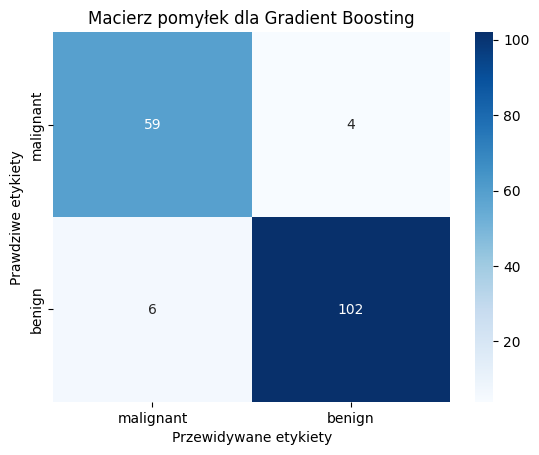

In [28]:
# Wizualizacja macierzy pomyłek
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Przewidywane etykiety')
plt.ylabel('Prawdziwe etykiety')
plt.title('Macierz pomyłek dla Gradient Boosting')
plt.show()
